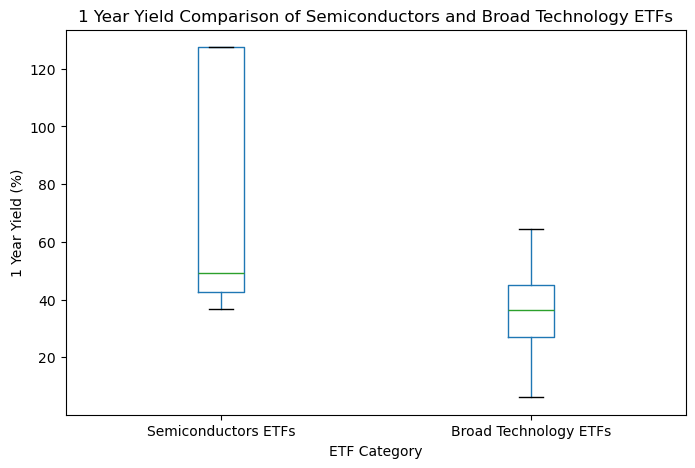

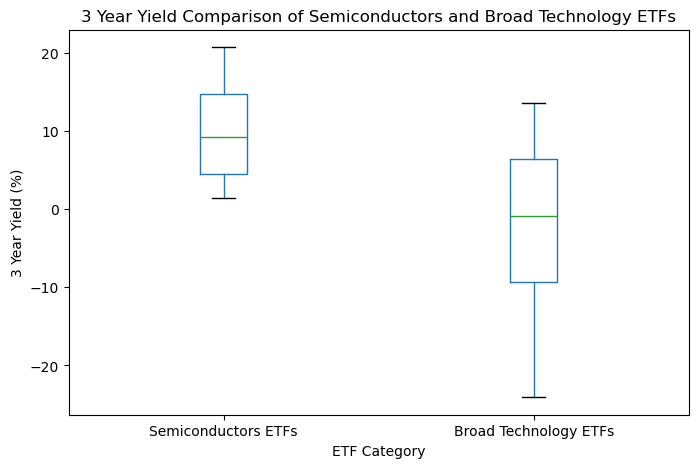

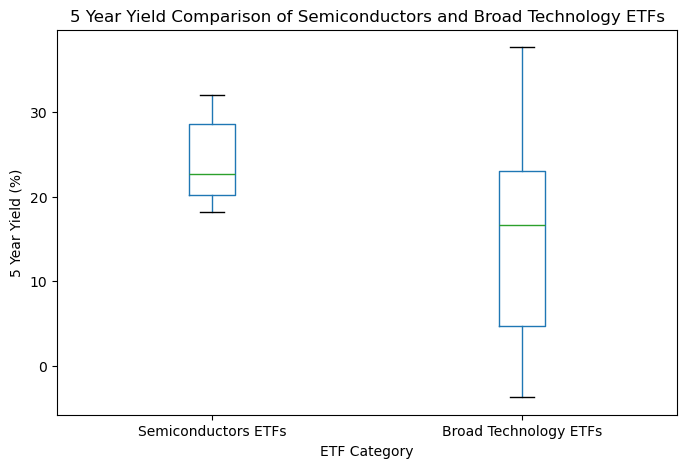

Average Yields for Semiconductors ETFs:
1 Year    132.077500
3 Year     10.520000
5 Year     28.354286
dtype: float64

Average Yields for Broad Technology ETFs:
1 Year    43.821951
3 Year    -1.782419
5 Year    16.383171
dtype: float64

Comparison of Average Yields:
        Semiconductors ETFs Average Yield  Broad Technology ETFs Average Yield
1 Year                         132.077500                            43.821951
3 Year                          10.520000                            -1.782419
5 Year                          28.354286                            16.383171


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

semiconductors_etfs = pd.read_csv('semiconductors_etf.csv')
broad_technology_etfs = pd.read_csv('broadtechnology_etf.csv')

semiconductors_etfs = semiconductors_etfs[semiconductors_etfs['Inverse'] == 'No']
broad_technology_etfs = broad_technology_etfs[broad_technology_etfs['Inverse'] == 'No']

semiconductors_etfs.replace('N/A', np.nan, inplace=True)
broad_technology_etfs.replace('N/A', np.nan, inplace=True)

columns_to_average = ['1 Year', '3 Year', '5 Year']

for col in columns_to_average:
    semiconductors_etfs[col] = semiconductors_etfs[col].replace({r'[^\d.-]': ''}, regex=True)
    broad_technology_etfs[col] = broad_technology_etfs[col].replace({r'[^\d.-]': ''}, regex=True)

semiconductors_etfs[columns_to_average] = semiconductors_etfs[columns_to_average].apply(pd.to_numeric, errors='coerce')
broad_technology_etfs[columns_to_average] = broad_technology_etfs[columns_to_average].apply(pd.to_numeric, errors='coerce')

for year in columns_to_average:
    plt.figure(figsize=(8, 5))
    plt.title(f"{year} Yield Comparison of Semiconductors and Broad Technology ETFs")
    plt.xlabel("ETF Category")
    plt.ylabel(f"{year} Yield (%)")

    year_data = pd.DataFrame({
        "Semiconductors ETFs": semiconductors_etfs[year].dropna(),
        "Broad Technology ETFs": broad_technology_etfs[year].dropna()
    })
    
    year_data.boxplot(grid=False, showfliers=False)
    plt.show()

semiconductors_avg_yields = semiconductors_etfs[columns_to_average].mean()

broad_technology_avg_yields = broad_technology_etfs[columns_to_average].mean()

print("Average Yields for Semiconductors ETFs:")
print(semiconductors_avg_yields)
print("\nAverage Yields for Broad Technology ETFs:")
print(broad_technology_avg_yields)

comparison_df = pd.DataFrame({
    'Semiconductors ETFs Average Yield': semiconductors_avg_yields,
    'Broad Technology ETFs Average Yield': broad_technology_avg_yields
})
print("\nComparison of Average Yields:")
print(comparison_df)
